In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

C:\Users\Alex\AppData\Local\Temp\ipykernel_276\2000247249.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd. read_csv('house.csv')

In [3]:
df.head()

,Price,Area,Kamin
0,84.4,2.00,Yes
1,77.4,1.71,No
2,75.7,1.45,No
3,85.9,1.76,Yes
4,79.1,1.93,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   15 non-null     float64
 1   Area    15 non-null     float64
 2   Kamin   15 non-null     object 
dtypes: float64(2), object(1)
memory usage: 492.0+ bytes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,15.0,79.560,4.819129,70.4,76.30,79.10,84.100,86.7
Area,15.0,1.662,0.235257,1.2,1.52,1.59,1.895,2.0


In [7]:
# Откройте набор House3.csv. 
# В ней мы будем предсказывать стоимость дома по его площади и наличию камина. 
# Целевой столбец – Price. 
# Нецелевые – Area, Kamin. 
# Очевидно, что дом с камином стоит больше, чем без него, поэтому наличие камина также нужно включить в нашу модель. 
# Закодируйте камин 0/1. 
# Сделайте предсказание цены дома, используя модель линейной регрессии для размера дома равного 2, с камином. 
# Правильный ответ 86,315.

In [8]:
d = {'No' : 0, 'Yes' : 1}
df['Kamin'] = df['Kamin'].map(d)

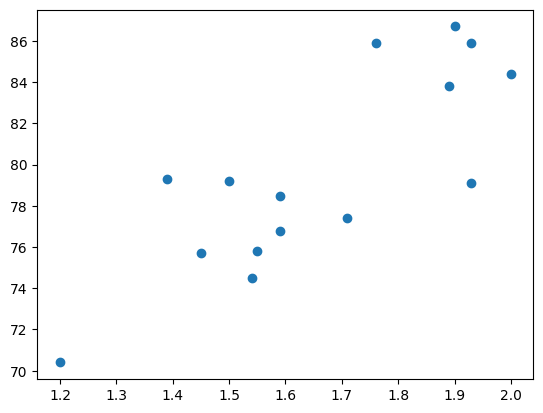

In [18]:
plt.scatter(df['Area'],df['Price'])

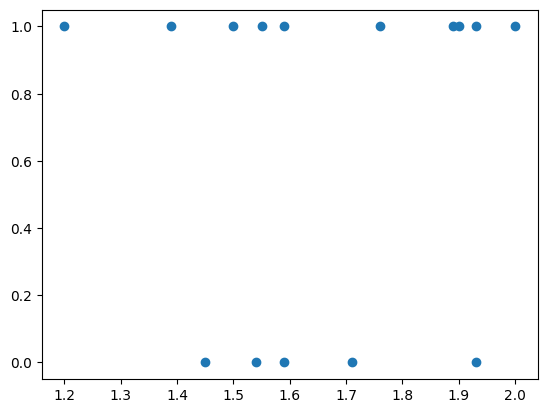

In [17]:
plt.scatter(df['Area'], df['Kamin'])

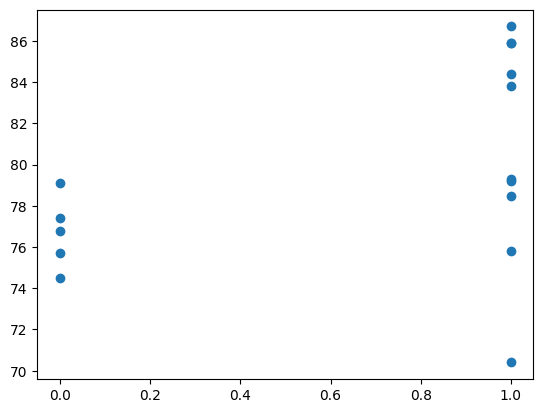

In [19]:
plt.scatter(df['Kamin'],df['Price'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_276\186475453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df['Kamin'], data = df, palette='viridis')


<Axes: xlabel='Kamin', ylabel='count'>

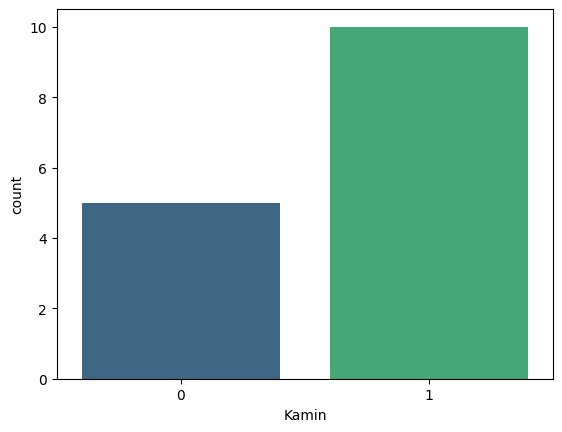

In [23]:
sns.countplot(x= df['Kamin'], data = df, palette='viridis')

<Axes: xlabel='Area', ylabel='Count'>

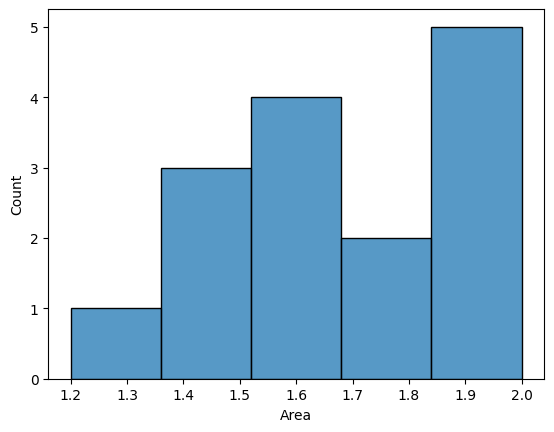

In [24]:
sns.histplot(x='Area', data = df)

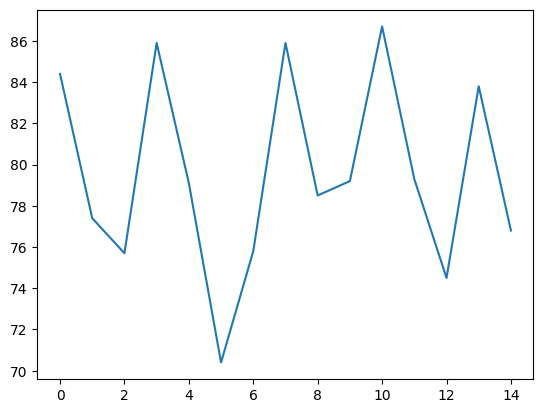

In [25]:
plt.plot(df['Price'])

In [10]:
X1, y = df.drop(["Price"], axis = 1), df['Price']
# обучите модель на X1, y 
# сделайте предсказание

In [12]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X1,y)

LinearRegression()

In [26]:
r.coef_, X1.columns

(array([16.18583395,  3.85298248]), Index(['Area', 'Kamin'], dtype='object'))

In [28]:
pd.DataFrame(X1.columns, lr.coef_, columns = ['coef']).sort_values(by='coef', ascending=False)

,coef
3.852982,Kamin
16.185834,Area


In [29]:
lr.intercept_

50.09048898900842

In [35]:
y_pred = 2*lr.coef_[0] + 1*lr.coef_[1] + lr.intercept_
print(y_pred)

86.31513936898799
